<a href="https://colab.research.google.com/github/Elma-dev/Customer_Shopping_Dataset-_Retail_Sales_Data/blob/main/Customer_Shopping_Dataset__Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read Data

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = 15,8.27

In [3]:
! unzip archive.zip

Archive:  archive.zip
  inflating: customer_shopping_data.csv  


In [5]:
data=pd.read_csv("customer_shopping_data.csv")

In [9]:
data.sample(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
5995,I211460,C308292,Male,35,Technology,5,5250.00,Credit Card,27/07/2022,Zorlu Center
20719,I147544,C512569,Male,49,Clothing,1,300.08,Cash,18/04/2021,Kanyon
79403,I271151,C197491,Male,62,Toys,5,179.20,Debit Card,20/01/2021,Kanyon
56929,I159964,C158755,Male,58,Books,5,75.75,Debit Card,2/8/2022,Metropol AVM
11198,I249425,C109605,Male,27,Shoes,2,1200.34,Credit Card,25/03/2022,Mall of Istanbul


In [14]:
data=data.drop(["invoice_no","customer_id"],axis=1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          99457 non-null  object 
 1   age             99457 non-null  int64  
 2   category        99457 non-null  object 
 3   quantity        99457 non-null  int64  
 4   price           99457 non-null  float64
 5   payment_method  99457 non-null  object 
 6   invoice_date    99457 non-null  object 
 7   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.1+ MB


In [19]:
data.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


#Analys Data

<Axes: >

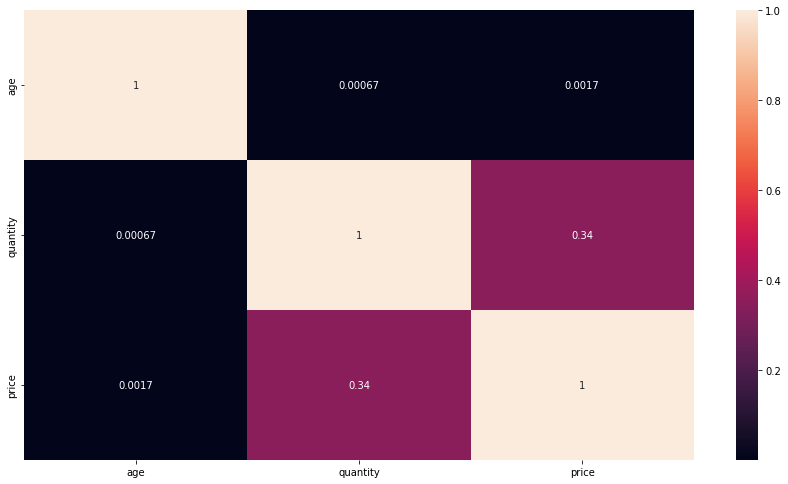

In [79]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='quantity'>

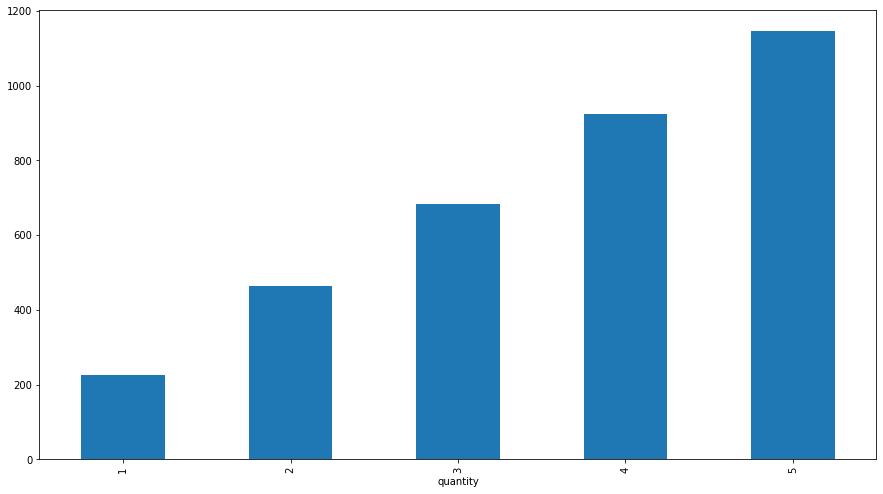

In [80]:
data.groupby('quantity').price.mean().plot.bar()

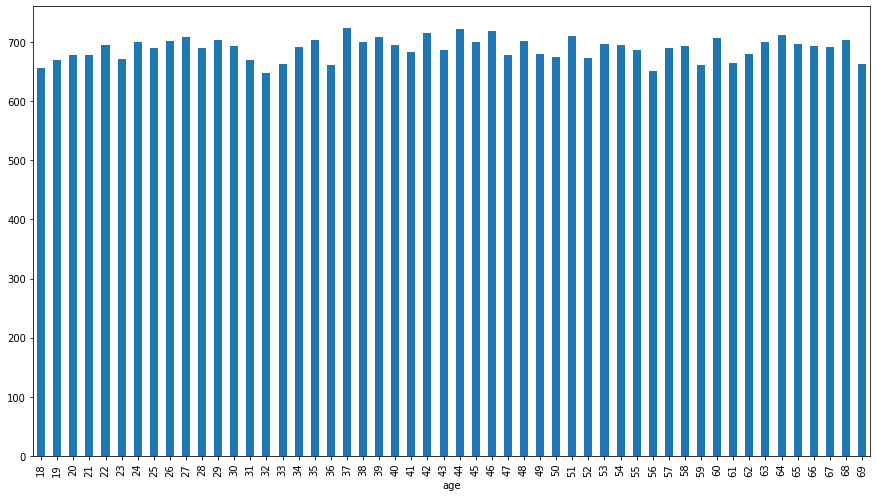

In [81]:
data.groupby('age').price.mean().plot.bar()
plt.show()

In [22]:
data['invoice_date']=pd.to_datetime(data['invoice_date'])

<ipython-input-22-54b32c004104>:1: UserWarning: Parsing '16/05/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['invoice_date']=pd.to_datetime(data['invoice_date'])
<ipython-input-22-54b32c004104>:1: UserWarning: Parsing '24/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['invoice_date']=pd.to_datetime(data['invoice_date'])
<ipython-input-22-54b32c004104>:1: UserWarning: Parsing '24/05/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['invoice_date']=pd.to_datetime(data['invoice_date'])
<ipython-input-22-54b32c004104>:1: UserWarning: Parsing '13/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['invoice_date']=pd.to_datetime(data['invoice_date'])
<ipython-input-22-54b32c004104>:1: UserWarning: Parsing '13/01/2021' in DD/MM/YYYY forma

In [31]:
data['invoice_date'].dt.year

0        2022
1        2021
2        2021
3        2021
4        2021
         ... 
99452    2022
99453    2021
99454    2021
99455    2021
99456    2022
Name: invoice_date, Length: 99457, dtype: int64

In [36]:
data_indx_date=data.set_index(data['invoice_date'])

In [91]:
yearsVsprice=data.groupby(data['invoice_date'].dt.year).price.mean().reset_index()

<Axes: xlabel='invoice_date', ylabel='price'>

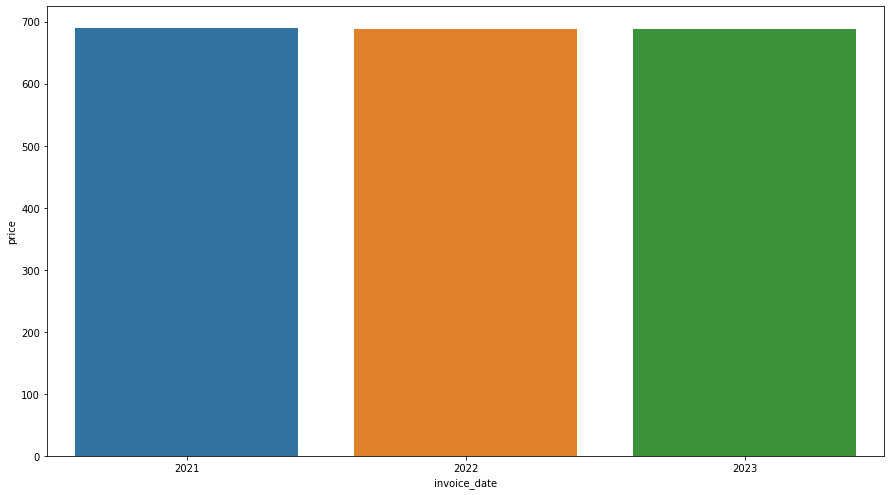

In [92]:
sns.barplot(data=yearsVsprice,x='invoice_date',y='price')

In [50]:
dateVsprice=data.groupby(data['invoice_date'].dt.month).price.mean().reset_index()

<Axes: xlabel='invoice_date', ylabel='price'>

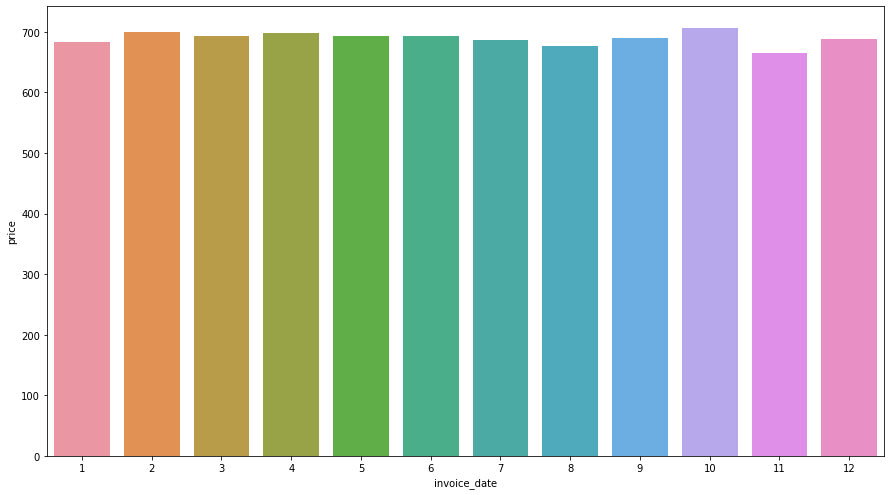

In [82]:
sns.barplot(data=dateVsprice,x='invoice_date',y='price')

<Axes: xlabel='invoice_date', ylabel='price'>

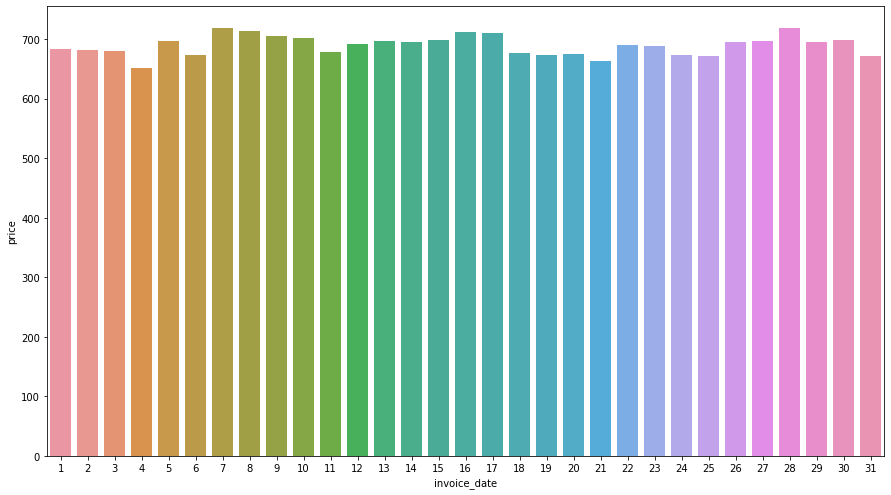

In [83]:
dayVSprice=data.groupby(data['invoice_date'].dt.day).price.mean().reset_index()
sns.barplot(data=dayVSprice,x='invoice_date',y='price')

In [118]:
genderVSprice=data.groupby('gender').price.sum().reset_index()

In [119]:
genderVSprice

,gender,price
0,Female,40931801.62
1,Male,27619564.29


<Axes: xlabel='gender', ylabel='price'>

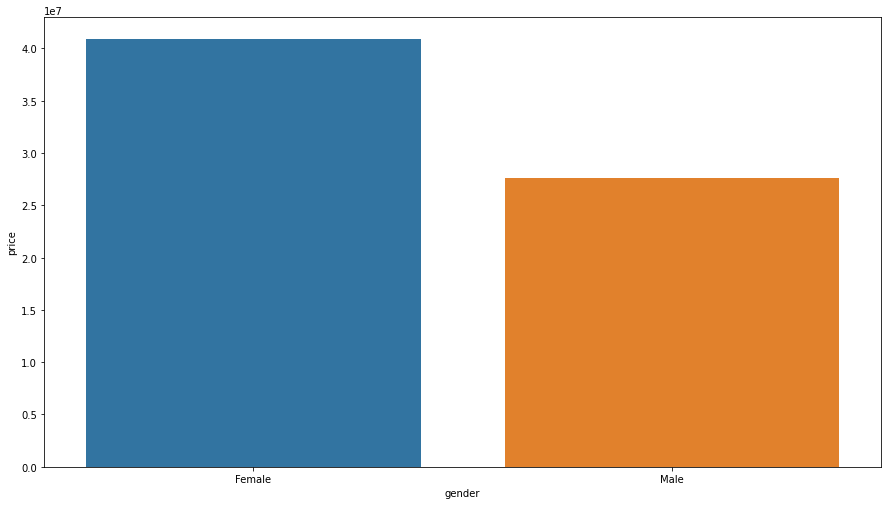

In [120]:
sns.barplot(data=genderVSprice,x='gender',y='price')

In [117]:
data.groupby(['category','gender']).price.sum().reset_index()

,category,gender,price
0,Books,Female,132956.40
1,Books,Male,94020.90
2,Clothing,Female,18616663.12
3,Clothing,Male,12459021.52
4,Cosmetics,Female,1108432.26
5,Cosmetics,Male,740174.64
6,Food & Beverage,Female,137873.26
7,Food & Beverage,Male,93695.45
8,Shoes,Female,10746644.02
9,Shoes,Male,7388692.87


In [113]:
import plotly.express as px
px.histogram(data,x='category',y='price',color='gender')

In [128]:
data.groupby(['category','gender']).price.sum().reset_index()

,category,gender,price
0,Books,Female,132956.40
1,Books,Male,94020.90
2,Clothing,Female,18616663.12
3,Clothing,Male,12459021.52
4,Cosmetics,Female,1108432.26
5,Cosmetics,Male,740174.64
6,Food & Beverage,Female,137873.26
7,Food & Beverage,Male,93695.45
8,Shoes,Female,10746644.02
9,Shoes,Male,7388692.87


<Axes: xlabel='payment_method'>

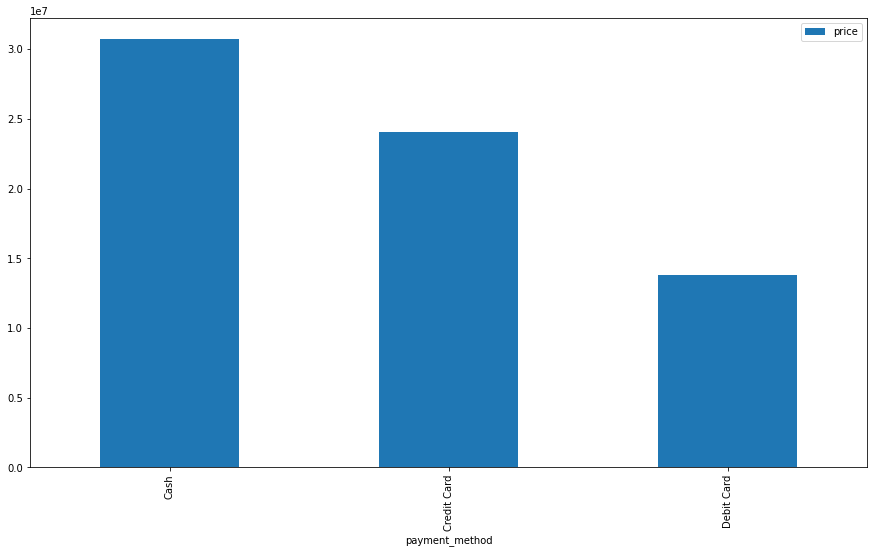

In [140]:
data.groupby('payment_method').price.sum().to_frame().plot.bar()

#Preprocessing Data

In [153]:
data['month']=data.invoice_date.dt.month

In [155]:
data['year']=data.invoice_date.dt.year

In [158]:
data=data.drop('invoice_date',axis=1)

In [160]:
categorical_data=['gender','category','shopping_mall','payment_method']
numerical_data=['age','quantity','month','year']

In [161]:
data.isna().sum()

gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
shopping_mall     0
month             0
year              0
dtype: int64

In [215]:
x=data[categorical_data+numerical_data]
y=data['price']

In [216]:
#Splitin Of Data
x_train=x[x['year']!=2023]
y_train=data[data['year']!=2023].price.values
x_test=x[x['year']==2023]
y_test=data[data['year']==2023].price.values

In [217]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(90933, 8) (90933,)
(8524, 8) (8524,)


In [218]:
#Encodin Data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
column_trans1=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical_data)],remainder='passthrough')
column_trans2=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),categorical_data)],remainder='passthrough')
x_train=column_trans1.fit_transform(x_train).toarray()
x_test=column_trans2.fit_transform(x_test).toarray()

In [220]:
#Feauture Scaling 
from sklearn.preprocessing import StandardScaler
standarScaler=StandardScaler()
x_train_scal=standarScaler.fit_transform(x_train)
y_train_scal=standarScaler.fit_transform(y_train.reshape(-1,1))

In [243]:
x_test_scal=standarScaler.fit_transform(x_test)
y_test_scal=standarScaler.fit_transform(y_test.reshape(-1,1))

In [244]:
y_train_scal=y_train_scal.reshape(-1)

In [245]:
y_test_scal=y_test_scal.reshape(-1)

In [246]:

y_train_scal.shape

(90933,)

#Model Train

**LinearRegression**

In [254]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [258]:
y_predict=lr.predict(x_test)

In [259]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict,squared=False)

371.66518862555716

In [263]:
print(f'Score : {lr.score(x_test,y_test)*100}%')

Score : 84.73235492131353%


**Decision Tree**

In [265]:
from sklearn.tree import DecisionTreeRegressor
decisionTree=DecisionTreeRegressor()
decisionTree.fit(x_test,y_test)

DecisionTreeRegressor()

In [276]:
y_pred_dt=decisionTree.predict(x_test)

In [277]:
mean_squared_error(y_test,y_pred_dt,squared=False)

4.709064488258513e-12

In [278]:
print(f'Score : {decisionTree.score(x_test,y_test)*100}%')

Score : 100.0%
